In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Newzeleand_2021

In [5]:
Newzeleand_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
40,40,TA Boult (NZ),3,-,-,-,-,-,-,-,...,113,5,4/27,22.60,3.91,34.6,1,0,3,0
57,57,DP Conway (NZ),3,3,0,225,126,75.00,255,88.23,...,-,-,-,-,-,-,-,-,3,0
100,100,MJ Guptill (NZ),3,3,0,84,38,28.00,71,118.30,...,-,-,-,-,-,-,-,-,2,0
112,112,MJ Henry (NZ),3,-,-,-,-,-,-,-,...,101,6,4/27,16.83,3.48,29.0,1,0,0,0
123,123,KA Jamieson (NZ),3,-,-,-,-,-,-,-,...,91,2,1/30,45.50,3.50,78.0,0,0,0,0
149,149,TWM Latham (NZ),3,2,1,128,110*,128.00,141,90.78,...,-,-,-,-,-,-,-,-,3,1
189,189,DJ Mitchell (NZ),3,2,2,112,100*,-,98,114.28,...,33,0,-,-,6.60,-,0,0,0,0
218,218,JDS Neesham (NZ),3,2,0,34,30,17.00,38,89.47,...,127,7,5/27,18.14,5.14,21.1,0,1,1,0
223,223,HM Nicholls (NZ),3,3,1,80,49*,40.00,92,86.95,...,-,-,-,-,-,-,-,-,3,0
277,277,MJ Santner (NZ),3,1,1,3,3*,-,1,300.00,...,81,4,2/23,20.25,3.85,31.5,0,0,3,0


In [6]:
Newzeleand_2021=Newzeleand_2021.reset_index()

In [7]:
Newzeleand_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,40,40,TA Boult (NZ),3,-,-,-,-,-,-,...,113,5,4/27,22.60,3.91,34.6,1,0,3,0
1,57,57,DP Conway (NZ),3,3,0,225,126,75.00,255,...,-,-,-,-,-,-,-,-,3,0
2,100,100,MJ Guptill (NZ),3,3,0,84,38,28.00,71,...,-,-,-,-,-,-,-,-,2,0
3,112,112,MJ Henry (NZ),3,-,-,-,-,-,-,...,101,6,4/27,16.83,3.48,29.0,1,0,0,0
4,123,123,KA Jamieson (NZ),3,-,-,-,-,-,-,...,91,2,1/30,45.50,3.50,78.0,0,0,0,0
5,149,149,TWM Latham (NZ),3,2,1,128,110*,128.00,141,...,-,-,-,-,-,-,-,-,3,1
6,189,189,DJ Mitchell (NZ),3,2,2,112,100*,-,98,...,33,0,-,-,6.60,-,0,0,0,0
7,218,218,JDS Neesham (NZ),3,2,0,34,30,17.00,38,...,127,7,5/27,18.14,5.14,21.1,0,1,1,0
8,223,223,HM Nicholls (NZ),3,3,1,80,49*,40.00,92,...,-,-,-,-,-,-,-,-,3,0
9,277,277,MJ Santner (NZ),3,1,1,3,3*,-,1,...,81,4,2/23,20.25,3.85,31.5,0,0,3,0


In [8]:
Newzeleand_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Newzeleand_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,TA Boult (NZ),3,-,-,-,-,-,-,-,-,...,113,5,4/27,22.60,3.91,34.6,1,0,3,0
1,DP Conway (NZ),3,3,0,225,126,75.00,255,88.23,1,...,-,-,-,-,-,-,-,-,3,0
2,MJ Guptill (NZ),3,3,0,84,38,28.00,71,118.30,0,...,-,-,-,-,-,-,-,-,2,0
3,MJ Henry (NZ),3,-,-,-,-,-,-,-,-,...,101,6,4/27,16.83,3.48,29.0,1,0,0,0
4,KA Jamieson (NZ),3,-,-,-,-,-,-,-,-,...,91,2,1/30,45.50,3.50,78.0,0,0,0,0
5,TWM Latham (NZ),3,2,1,128,110*,128.00,141,90.78,1,...,-,-,-,-,-,-,-,-,3,1
6,DJ Mitchell (NZ),3,2,2,112,100*,-,98,114.28,1,...,33,0,-,-,6.60,-,0,0,0,0
7,JDS Neesham (NZ),3,2,0,34,30,17.00,38,89.47,0,...,127,7,5/27,18.14,5.14,21.1,0,1,1,0
8,HM Nicholls (NZ),3,3,1,80,49*,40.00,92,86.95,0,...,-,-,-,-,-,-,-,-,3,0
9,MJ Santner (NZ),3,1,1,3,3*,-,1,300.00,0,...,81,4,2/23,20.25,3.85,31.5,0,0,3,0


In [10]:
Newzeleand_2021_players =Newzeleand_2021.copy()

In [11]:
Newzeleand_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
Newzeleand_2021_players.HS=Newzeleand_2021_players.HS.str.extract('(\d+)')
Newzeleand_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
Newzeleand_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,3,-,-,-,0,-,-,-,-,-,...,113,5,4/27,22.60,3.91,34.6,1,0,3,0
1,3,3,0,225,126,75.00,255,88.23,1,1,...,-,-,-,-,-,-,-,-,3,0
2,3,3,0,84,38,28.00,71,118.30,0,0,...,-,-,-,-,-,-,-,-,2,0
3,3,-,-,-,0,-,-,-,-,-,...,101,6,4/27,16.83,3.48,29.0,1,0,0,0
4,3,-,-,-,0,-,-,-,-,-,...,91,2,1/30,45.50,3.50,78.0,0,0,0,0
5,3,2,1,128,110,128.00,141,90.78,1,0,...,-,-,-,-,-,-,-,-,3,1
6,3,2,2,112,100,-,98,114.28,1,0,...,33,0,-,-,6.60,-,0,0,0,0
7,3,2,0,34,30,17.00,38,89.47,0,0,...,127,7,5/27,18.14,5.14,21.1,0,1,1,0
8,3,3,1,80,49,40.00,92,86.95,0,0,...,-,-,-,-,-,-,-,-,3,0
9,3,1,1,3,3,-,1,300.00,0,0,...,81,4,2/23,20.25,3.85,31.5,0,0,3,0


In [14]:
Newzeleand_2021_players.replace("-",0,inplace=True)

In [15]:
Newzeleand_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Newzeleand_2021_players_scaled = pd.DataFrame(scaler.fit_transform(Newzeleand_2021_players),columns=Newzeleand_2021_players.columns)
Newzeleand_2021_players_scaled.shape
Newzeleand_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.420084,-1.420127,-0.774597,-0.841153,-0.880008,-0.679292,-0.810789,-1.114621,-0.577350,-0.301511,...,0.000000,1.345812,1.147638,0.883236,0.726204,0.796419,2.236068,-0.301511,1.073030,-0.301511
1,0.420084,1.270640,-0.774597,2.474342,1.927106,1.312117,2.620767,0.030778,1.732051,3.316625,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,1.073030,-0.301511
2,0.420084,1.270640,-0.774597,0.396631,-0.033418,0.064168,0.144664,0.421146,-0.577350,-0.301511,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,0.315597,-0.301511
3,0.420084,-1.420127,-0.774597,-0.841153,-0.880008,-0.679292,-0.810789,-1.114621,-0.577350,-0.301511,...,2.809757,1.106557,1.530184,0.469689,0.542877,0.554250,2.236068,-0.301511,-1.199269,-0.301511
4,0.420084,-1.420127,-0.774597,-0.841153,-0.880008,-0.679292,-0.810789,-1.114621,-0.577350,-0.301511,...,1.123903,0.907177,0.000000,2.524520,0.551404,2.673230,-0.447214,-0.301511,-1.199269,-0.301511


In [17]:
Newzeleand_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.200000e+01,1.200000e+01,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,...,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,1.850372e-17,6.938894e-17,0.000000,-3.700743e-17,-2.775558e-17,1.850372e-17,-1.850372e-17,-1.272131e-17,1.850372e-17,-7.401487e-17,...,1.850372e-17,1.850372e-17,1.850372e-17,5.551115e-17,1.850372e-17,1.850372e-17,1.202742e-16,-3.700743e-17,7.401487e-17,-3.700743e-17
std,1.044466e+00,1.044466e+00,1.044466,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,...,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00,1.044466e+00
min,-2.940588e+00,-1.420127e+00,-0.774597,-8.411534e-01,-8.800078e-01,-6.792917e-01,-8.107893e-01,-1.114621e+00,-5.773503e-01,-3.015113e-01,...,-5.619515e-01,-9.071770e-01,-7.650921e-01,-7.365473e-01,-9.407971e-01,-6.998400e-01,-4.472136e-01,-3.015113e-01,-1.199269e+00,-3.015113e-01
25%,4.200840e-01,-7.474351e-01,-0.774597,-8.079984e-01,-8.298808e-01,-6.792917e-01,-8.006965e-01,-6.277973e-01,-5.773503e-01,-3.015113e-01,...,-5.619515e-01,-9.071770e-01,-7.650921e-01,-7.365473e-01,-9.407971e-01,-6.998400e-01,-4.472136e-01,-3.015113e-01,-1.199269e+00,-3.015113e-01
50%,4.200840e-01,3.737175e-01,-0.774597,-5.022361e-01,-4.232949e-01,-4.270465e-01,-4.609051e-01,3.882691e-02,-5.773503e-01,-3.015113e-01,...,-5.619515e-01,-5.782007e-01,-7.650921e-01,-7.365473e-01,-1.989601e-01,-6.998400e-01,-4.472136e-01,-3.015113e-01,-6.311944e-02,-3.015113e-01
75%,4.200840e-01,5.979481e-01,0.774597,4.997802e-01,4.957006e-01,1.438240e-01,4.474481e-01,1.549507e-01,0.000000e+00,-3.015113e-01,...,1.404879e-01,9.570219e-01,8.607286e-01,6.013862e-01,7.070189e-01,5.812781e-01,-4.472136e-01,-3.015113e-01,1.073030e+00,-3.015113e-01
max,4.200840e-01,1.270640e+00,2.323790,2.474342e+00,1.927106e+00,2.719379e+00,2.620767e+00,2.779970e+00,1.732051e+00,3.316625e+00,...,2.809757e+00,1.624943e+00,1.912730e+00,2.524520e+00,1.873067e+00,2.673230e+00,2.236068e+00,3.316625e+00,1.073030e+00,3.316625e+00


In [18]:
X =  Newzeleand_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 0.42008403, -1.42012668, -0.77459667, -0.84115337, -0.88000778,
        -0.67929166, -0.81078934, -1.1146213 , -0.57735027, -0.30151134,
         0.        , -0.78439066, -0.40482045, -1.44453196,  0.42008403,
         1.09879837,  1.37944371,  0.        ,  1.34581207,  1.14763808,
         0.88323566,  0.72620439,  0.79641941,  2.23606798, -0.30151134,
         1.07303049, -0.30151134],
       [ 0.42008403,  1.27063966, -0.77459667,  2.47434166,  1.92710565,
         1.31211711,  2.62076721,  0.03077809,  1.73205081,  3.31662479,
         0.        ,  2.71175057, -0.40482045, -1.26943717,  0.42008403,
        -0.98313538, -0.88759016, -0.56195149, -0.90717702, -0.76509206,
        -0.73654734, -0.94079707, -0.69984004, -0.4472136 , -0.30151134,
         1.07303049, -0.30151134],
       [ 0.42008403,  1.27063966, -0.77459667,  0.39663144, -0.03341802,
         0.06416762,  0.14466366,  0.42114599, -0.57735027, -0.30151134,
         0.        ,  0.2913451 ,  3.06506914, -0.8265

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Newzeleand_2021_players_scaled))

False

In [23]:
Newzeleand_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.420084,-1.420127,-0.774597,-0.841153,-0.880008,-0.679292,-0.810789,-1.114621,-0.577350,-0.301511,...,0.000000,1.345812,1.147638,0.883236,0.726204,0.796419,2.236068,-0.301511,1.073030,-0.301511
1,0.420084,1.270640,-0.774597,2.474342,1.927106,1.312117,2.620767,0.030778,1.732051,3.316625,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,1.073030,-0.301511
2,0.420084,1.270640,-0.774597,0.396631,-0.033418,0.064168,0.144664,0.421146,-0.577350,-0.301511,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,0.315597,-0.301511
3,0.420084,-1.420127,-0.774597,-0.841153,-0.880008,-0.679292,-0.810789,-1.114621,-0.577350,-0.301511,...,2.809757,1.106557,1.530184,0.469689,0.542877,0.554250,2.236068,-0.301511,-1.199269,-0.301511
4,0.420084,-1.420127,-0.774597,-0.841153,-0.880008,-0.679292,-0.810789,-1.114621,-0.577350,-0.301511,...,1.123903,0.907177,0.000000,2.524520,0.551404,2.673230,-0.447214,-0.301511,-1.199269,-0.301511
5,0.420084,0.373718,0.774597,1.044995,1.570647,2.719379,1.086660,0.063882,1.732051,-0.301511,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,1.073030,3.316625
6,0.420084,0.373718,2.323790,0.809226,1.347860,-0.679292,0.508005,0.368958,1.732051,-0.301511,...,-0.561951,-0.249224,-0.765092,-0.736547,1.873067,-0.699840,-0.447214,-0.301511,-1.199269,-0.301511
7,0.420084,0.373718,-0.774597,-0.340145,-0.211647,-0.227906,-0.299420,0.046876,-0.577350,-0.301511,...,0.561951,1.624943,1.912730,0.563579,1.250606,0.212619,-0.447214,3.316625,-0.441836,-0.301511
8,0.420084,1.270640,0.774597,0.337689,0.211647,0.382793,0.427262,0.014161,-0.577350,-0.301511,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,1.073030,-0.301511
9,0.420084,-0.523205,0.774597,-0.796947,-0.813172,-0.679292,-0.797332,2.779970,-0.577350,-0.301511,...,-0.561951,0.707797,0.765092,0.714807,0.700624,0.662361,-0.447214,-0.301511,1.073030,-0.301511


In [24]:
np.all(np.isfinite(Newzeleand_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


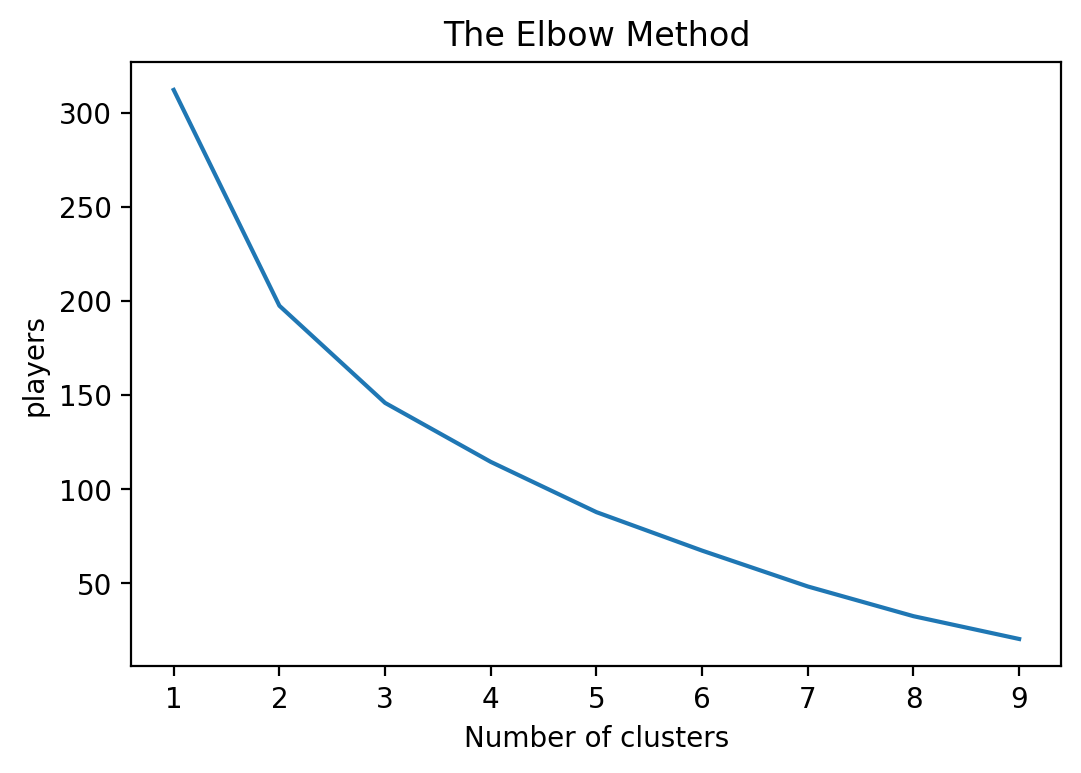

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0])

In [28]:
kmeans.cluster_centers_

array([[-2.10042013, -0.07474351,  0.        , -0.7011658 , -0.67949968,
        -0.42704655, -0.6291187 , -0.19095399, -0.57735027, -0.30151134,
         0.        , -0.58269021, -0.40482045,  1.61962674, -2.10042013,
        -0.98313538, -0.88759016, -0.56195149, -0.90717702, -0.76509206,
        -0.73654734, -0.94079707, -0.69984004, -0.4472136 , -0.30151134,
        -0.82055272, -0.30151134],
       [ 0.42008403,  0.91187081,  0.464758  ,  1.01257674,  1.00476838,
         0.75983308,  0.95747156,  0.17978517,  0.80829038,  0.42211588,
         0.        ,  0.96367996,  0.56674863, -0.37748375,  0.42008403,
        -0.70554422, -0.80804512, -0.56195149, -0.77558651, -0.76509206,
        -0.73654734, -0.3780242 , -0.69984004, -0.4472136 , -0.30151134,
         0.46708386,  0.42211588],
       [ 0.42008403, -0.88197341, -0.464758  , -0.73211042, -0.73296851,
        -0.58901446, -0.70582408, -0.10340357, -0.57735027, -0.30151134,
         0.        , -0.73060387, -0.40482045, -0.2703

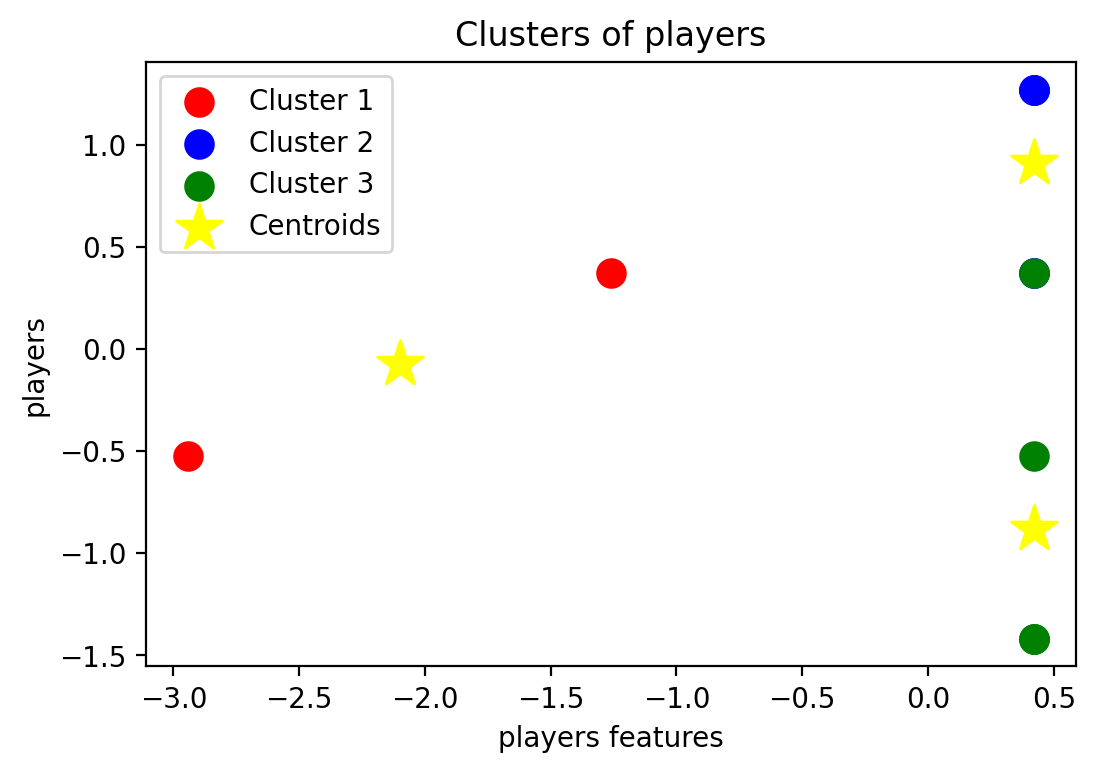

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Newzeleand_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,TA Boult (NZ),3,-,-,-,-,-,-,-,-,...,113,5,4/27,22.60,3.91,34.6,1,0,3,0
1,DP Conway (NZ),3,3,0,225,126,75.00,255,88.23,1,...,-,-,-,-,-,-,-,-,3,0
2,MJ Guptill (NZ),3,3,0,84,38,28.00,71,118.30,0,...,-,-,-,-,-,-,-,-,2,0
3,MJ Henry (NZ),3,-,-,-,-,-,-,-,-,...,101,6,4/27,16.83,3.48,29.0,1,0,0,0
4,KA Jamieson (NZ),3,-,-,-,-,-,-,-,-,...,91,2,1/30,45.50,3.50,78.0,0,0,0,0
5,TWM Latham (NZ),3,2,1,128,110*,128.00,141,90.78,1,...,-,-,-,-,-,-,-,-,3,1
6,DJ Mitchell (NZ),3,2,2,112,100*,-,98,114.28,1,...,33,0,-,-,6.60,-,0,0,0,0
7,JDS Neesham (NZ),3,2,0,34,30,17.00,38,89.47,0,...,127,7,5/27,18.14,5.14,21.1,0,1,1,0
8,HM Nicholls (NZ),3,3,1,80,49*,40.00,92,86.95,0,...,-,-,-,-,-,-,-,-,3,0
9,MJ Santner (NZ),3,1,1,3,3*,-,1,300.00,0,...,81,4,2/23,20.25,3.85,31.5,0,0,3,0


In [31]:
Newzeleand_2021["cluster"] = y_kmeans

In [32]:
Newzeleand_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,TA Boult (NZ),3,-,-,-,-,-,-,-,-,...,5,4/27,22.60,3.91,34.6,1,0,3,0,2
1,DP Conway (NZ),3,3,0,225,126,75.00,255,88.23,1,...,-,-,-,-,-,-,-,3,0,1
2,MJ Guptill (NZ),3,3,0,84,38,28.00,71,118.30,0,...,-,-,-,-,-,-,-,2,0,1
3,MJ Henry (NZ),3,-,-,-,-,-,-,-,-,...,6,4/27,16.83,3.48,29.0,1,0,0,0,2
4,KA Jamieson (NZ),3,-,-,-,-,-,-,-,-,...,2,1/30,45.50,3.50,78.0,0,0,0,0,2
5,TWM Latham (NZ),3,2,1,128,110*,128.00,141,90.78,1,...,-,-,-,-,-,-,-,3,1,1
6,DJ Mitchell (NZ),3,2,2,112,100*,-,98,114.28,1,...,0,-,-,6.60,-,0,0,0,0,1
7,JDS Neesham (NZ),3,2,0,34,30,17.00,38,89.47,0,...,7,5/27,18.14,5.14,21.1,0,1,1,0,2
8,HM Nicholls (NZ),3,3,1,80,49*,40.00,92,86.95,0,...,-,-,-,-,-,-,-,3,0,1
9,MJ Santner (NZ),3,1,1,3,3*,-,1,300.00,0,...,4,2/23,20.25,3.85,31.5,0,0,3,0,2


In [33]:
Newzeleand_2021['cluster'].value_counts()

1    5
2    5
0    2
Name: cluster, dtype: int64

In [34]:
Newzeleand_Cluster_2021 = np.array([2,5,5])

In [35]:
Newzeleand_Cluster_2021

array([2, 5, 5])

In [36]:
%store Newzeleand_Cluster_2021

Stored 'Newzeleand_Cluster_2021' (ndarray)


In [37]:
Newzeleand_2021_players_scaled.insert(0, 'Player', Newzeleand_2021.Player)

In [38]:
Newzeleand_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,TA Boult (NZ),0.420084,-1.420127,-0.774597,-0.841153,-0.880008,-0.679292,-0.810789,-1.114621,-0.577350,...,0.000000,1.345812,1.147638,0.883236,0.726204,0.796419,2.236068,-0.301511,1.073030,-0.301511
1,DP Conway (NZ),0.420084,1.270640,-0.774597,2.474342,1.927106,1.312117,2.620767,0.030778,1.732051,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,1.073030,-0.301511
2,MJ Guptill (NZ),0.420084,1.270640,-0.774597,0.396631,-0.033418,0.064168,0.144664,0.421146,-0.577350,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,0.315597,-0.301511
3,MJ Henry (NZ),0.420084,-1.420127,-0.774597,-0.841153,-0.880008,-0.679292,-0.810789,-1.114621,-0.577350,...,2.809757,1.106557,1.530184,0.469689,0.542877,0.554250,2.236068,-0.301511,-1.199269,-0.301511
4,KA Jamieson (NZ),0.420084,-1.420127,-0.774597,-0.841153,-0.880008,-0.679292,-0.810789,-1.114621,-0.577350,...,1.123903,0.907177,0.000000,2.524520,0.551404,2.673230,-0.447214,-0.301511,-1.199269,-0.301511
5,TWM Latham (NZ),0.420084,0.373718,0.774597,1.044995,1.570647,2.719379,1.086660,0.063882,1.732051,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,1.073030,3.316625
6,DJ Mitchell (NZ),0.420084,0.373718,2.323790,0.809226,1.347860,-0.679292,0.508005,0.368958,1.732051,...,-0.561951,-0.249224,-0.765092,-0.736547,1.873067,-0.699840,-0.447214,-0.301511,-1.199269,-0.301511
7,JDS Neesham (NZ),0.420084,0.373718,-0.774597,-0.340145,-0.211647,-0.227906,-0.299420,0.046876,-0.577350,...,0.561951,1.624943,1.912730,0.563579,1.250606,0.212619,-0.447214,3.316625,-0.441836,-0.301511
8,HM Nicholls (NZ),0.420084,1.270640,0.774597,0.337689,0.211647,0.382793,0.427262,0.014161,-0.577350,...,-0.561951,-0.907177,-0.765092,-0.736547,-0.940797,-0.699840,-0.447214,-0.301511,1.073030,-0.301511
9,MJ Santner (NZ),0.420084,-0.523205,0.774597,-0.796947,-0.813172,-0.679292,-0.797332,2.779970,-0.577350,...,-0.561951,0.707797,0.765092,0.714807,0.700624,0.662361,-0.447214,-0.301511,1.073030,-0.301511


In [39]:
Newzeleand_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,TA Boult (NZ),-0.679292,0.883236
1,DP Conway (NZ),1.312117,-0.736547
2,MJ Guptill (NZ),0.064168,-0.736547
3,MJ Henry (NZ),-0.679292,0.469689
4,KA Jamieson (NZ),-0.679292,2.524520
5,TWM Latham (NZ),2.719379,-0.736547
6,DJ Mitchell (NZ),-0.679292,-0.736547
7,JDS Neesham (NZ),-0.227906,0.563579
8,HM Nicholls (NZ),0.382793,-0.736547
9,MJ Santner (NZ),-0.679292,0.714807


In [40]:
Newzeleand_2021_Ave=Newzeleand_2021_players_scaled.mean()

In [41]:
Newzeleand_2021_Ave

Mat_x           1.850372e-17
Inns_x          6.938894e-17
NO              0.000000e+00
Runs_x         -3.700743e-17
HS             -2.775558e-17
Ave_x           1.850372e-17
BF             -1.850372e-17
SR_x           -1.272131e-17
100             1.850372e-17
50             -7.401487e-17
0               0.000000e+00
4s              1.850372e-17
6s             -1.850372e-17
Unnamed: 0_y    5.551115e-17
Mat_y           1.850372e-17
Inns_y         -1.850372e-17
Overs          -3.700743e-17
Mdns            1.850372e-17
Runs_y          1.850372e-17
Wkts            1.850372e-17
Ave_y           5.551115e-17
Econ            1.850372e-17
SR_y            1.850372e-17
4               1.202742e-16
5              -3.700743e-17
Ct              7.401487e-17
St             -3.700743e-17
dtype: float64

In [42]:
Newzeleand_Ave_2021 =Newzeleand_2021_Ave[['Ave_x','Ave_y']]

In [43]:
Newzeleand_Ave_2021

Ave_x    1.850372e-17
Ave_y    5.551115e-17
dtype: float64

In [44]:
Newzeleand_Ave_2021 = np.array([Newzeleand_Ave_2021.Ave_x, Newzeleand_Ave_2021.Ave_y])

In [45]:
Newzeleand_Ave_2021

array([1.85037171e-17, 5.55111512e-17])

In [46]:
%store Newzeleand_Ave_2021

Stored 'Newzeleand_Ave_2021' (ndarray)


In [47]:
Newzeleand_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,TA Boult (NZ),3,-,-,-,-,-,-,-,-,...,5,4/27,22.60,3.91,34.6,1,0,3,0,2
1,DP Conway (NZ),3,3,0,225,126,75.00,255,88.23,1,...,-,-,-,-,-,-,-,3,0,1
2,MJ Guptill (NZ),3,3,0,84,38,28.00,71,118.30,0,...,-,-,-,-,-,-,-,2,0,1
3,MJ Henry (NZ),3,-,-,-,-,-,-,-,-,...,6,4/27,16.83,3.48,29.0,1,0,0,0,2
4,KA Jamieson (NZ),3,-,-,-,-,-,-,-,-,...,2,1/30,45.50,3.50,78.0,0,0,0,0,2
5,TWM Latham (NZ),3,2,1,128,110*,128.00,141,90.78,1,...,-,-,-,-,-,-,-,3,1,1
6,DJ Mitchell (NZ),3,2,2,112,100*,-,98,114.28,1,...,0,-,-,6.60,-,0,0,0,0,1
7,JDS Neesham (NZ),3,2,0,34,30,17.00,38,89.47,0,...,7,5/27,18.14,5.14,21.1,0,1,1,0,2
8,HM Nicholls (NZ),3,3,1,80,49*,40.00,92,86.95,0,...,-,-,-,-,-,-,-,3,0,1
9,MJ Santner (NZ),3,1,1,3,3*,-,1,300.00,0,...,4,2/23,20.25,3.85,31.5,0,0,3,0,2
